## Mandelbrot Set Method 1

In [17]:
# credit https://levelup.gitconnected.com/mandelbrot-set-with-python-983e9fc47f56 for mandelbrot set code
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation 

# for more details increase max_steps

def get_iter(c:complex, thresh:int =4, max_steps:int =25, mult=1.0) -> int:
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    z=c
    i=1
    while i<max_steps and (z*z.conjugate()).real<thresh:
        z=z*z +c
        i+=1
    return i

In [8]:
def plotter(n, thresh, max_steps=25, multiplier = 1.0):
    mapper = lambda x,y: (4*(x-n//2)/n, 4*(y-n//2)/n)
    img=np.full((int(n*multiplier),int(n*multiplier)), 255)
    x_upper = int(multiplier * 5*n//8)
    y_lower = int((1/multiplier) * 2*n//10)
    y_upper = int(multiplier * 8*n//10)
    y_range = y_upper - y_lower
    x_lower = x_upper - y_range if multiplier < 1.0 else 0
    
    for x in range(x_lower, x_upper):
        for y in range(y_lower, y_upper):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
            img[y][x] = 255 - it
    return img[y_lower:y_upper, x_lower:x_upper]

def plotter_v2(n, thresh, max_steps=25, multiplier = 1.0):
    mapper = mapper = lambda x,y: (4*(x-n//2)/n, 4*(y-n//2)/n)
    img = img=np.full((int(n),int(n)), 255)
    
    x_lower = 0
    x_upper = int(5*n//8)
    x_range = x_upper - x_lower
    
    y_lower = int(2*n//10)
    y_upper = int(8*n//10)
    y_range = y_upper - y_lower
    
    for x in range(x_lower, x_upper):
        for y in range(y_lower, y_upper):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps, mult=multiplier)
            img[y][x] = 255 - it
    return img[y_lower:y_upper, x_lower:x_upper]

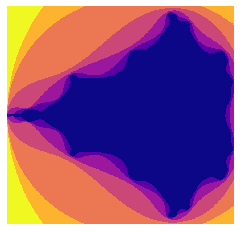

In [16]:
# increase n to increase image quality
n=1000
img = plotter_v2(n, thresh=4, max_steps=7, multiplier = .4)
ax = plt.imshow(img, cmap="plasma")

plt.axis("off")
plt.show()

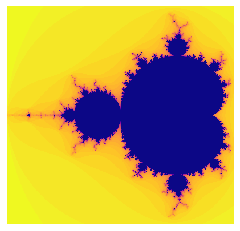

In [22]:
#plt.figure(dpi=1200)
plt.imshow(img, cmap="plasma")
plt.axis("off")
plt.savefig('mandelbrot_test3.jpg',dpi='figure',quality=95,optimize=True)

In [16]:
#plt.imshow(img, cmap="plasma")
plt.axis("off")
plt.show()

In [23]:
def show_image(color_map):
    plt.imshow(img, cmap=color_map)
    plt.axis("off")
    plt.show()

## Color Choices

In [25]:
#sauce: https://matplotlib.org/tutorials/colors/colormaps.html#colorcet
# color choice
# sphinx_gallery_thumbnail_number = 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

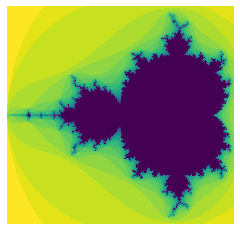

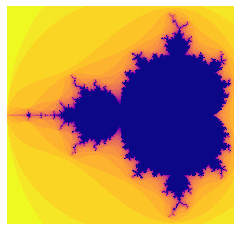

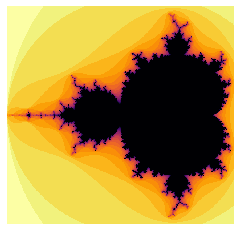

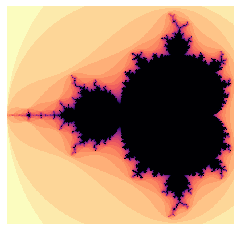

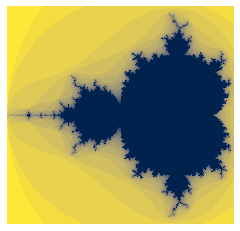

In [37]:
for c in cmaps['Perceptually Uniform Sequential']:
    show_image(c)

In [ ]:
for c in cmaps['Sequential']:
    show_image(c)

In [ ]:
for c in cmaps['Sequential (2)']:
    show_image(c)

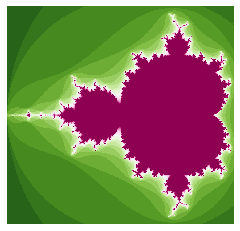

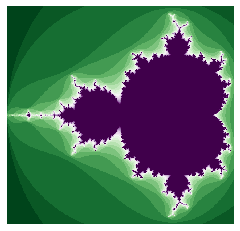

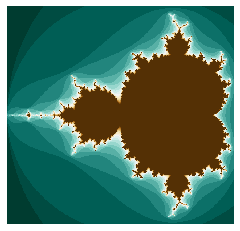

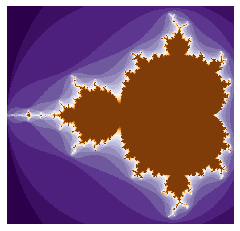

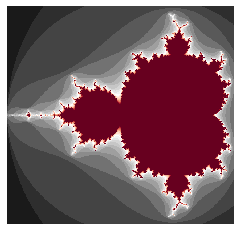

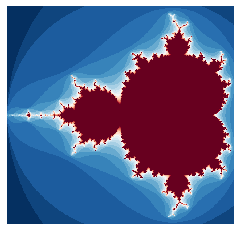

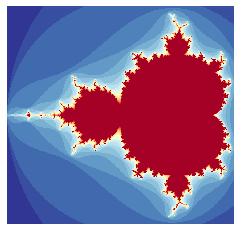

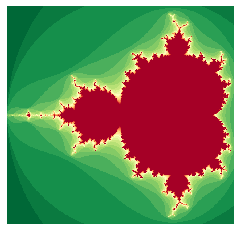

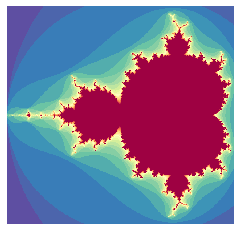

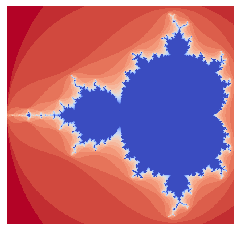

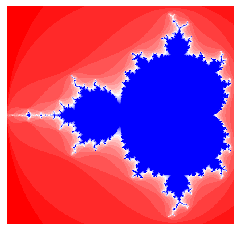

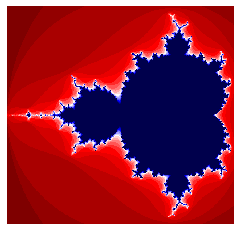

In [38]:
for c in cmaps['Diverging']:
    show_image(c)

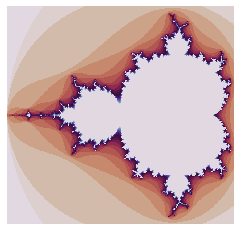

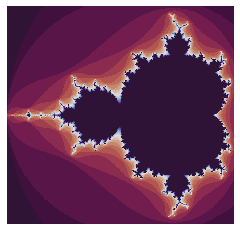

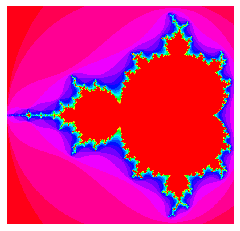

In [39]:
for c in cmaps['Cyclic']:
    show_image(c)

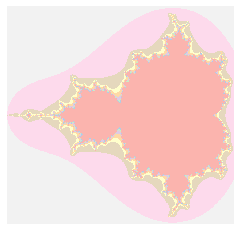

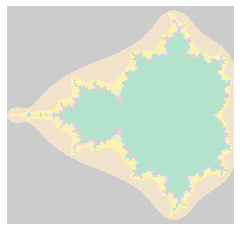

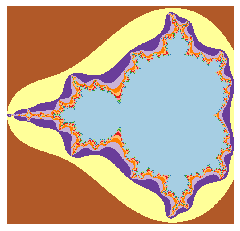

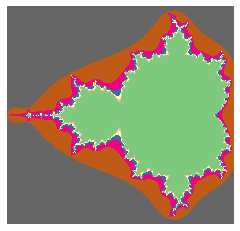

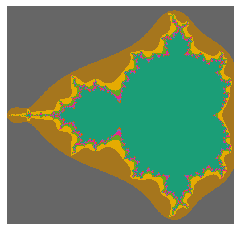

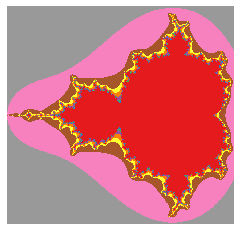

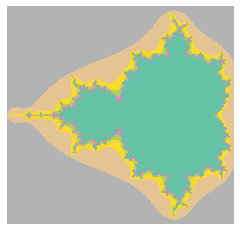

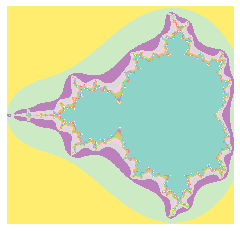

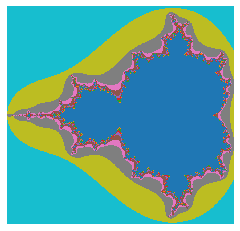

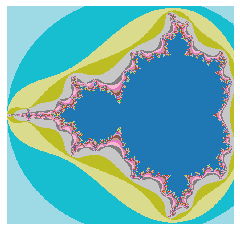

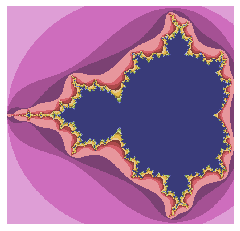

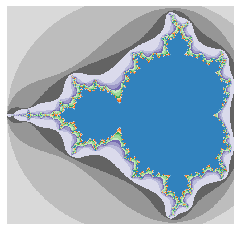

In [40]:
for c in cmaps['Qualitative']:
    show_image(c)

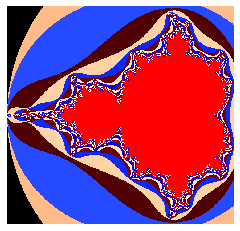

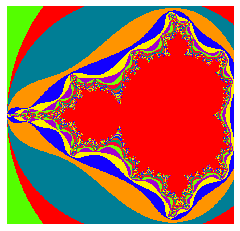

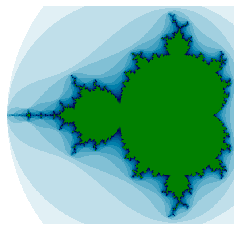

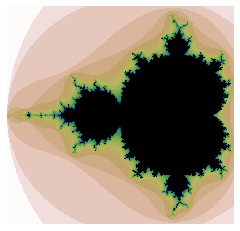

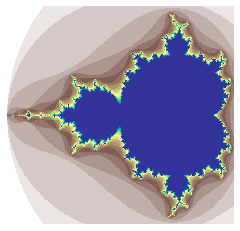

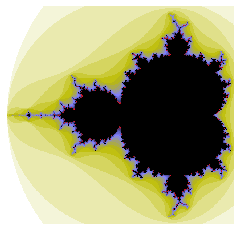

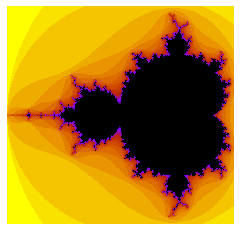

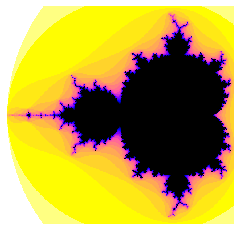

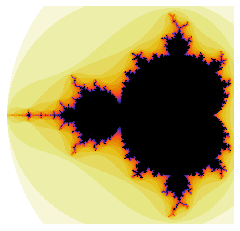

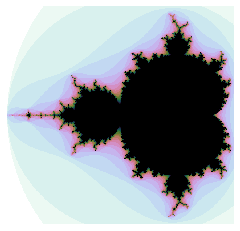

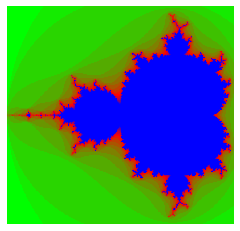

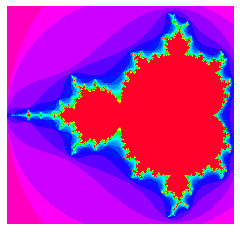

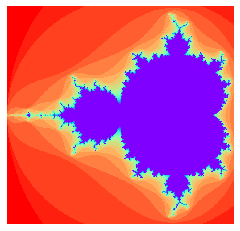

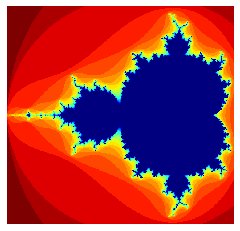

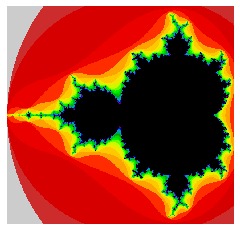

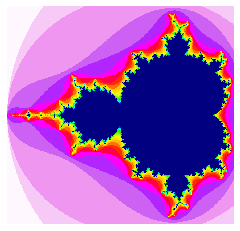

In [41]:
for c in cmaps['Miscellaneous']:
    show_image(c)

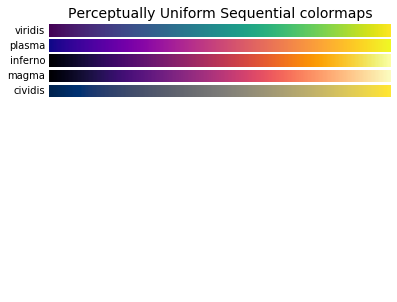

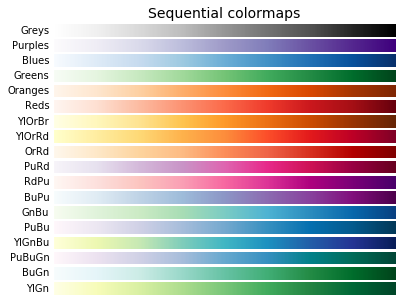

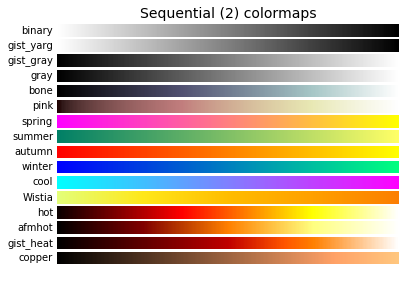

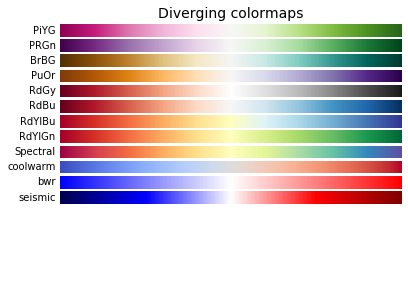

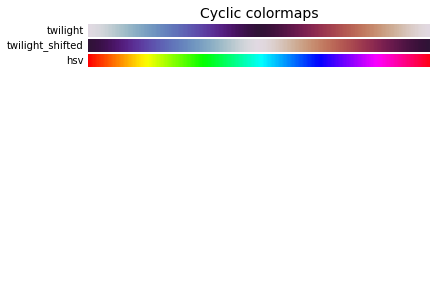

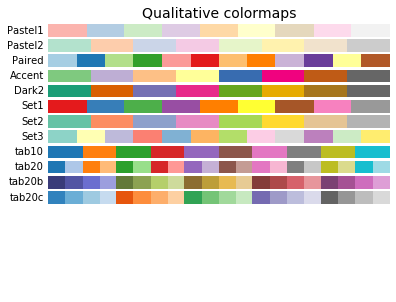

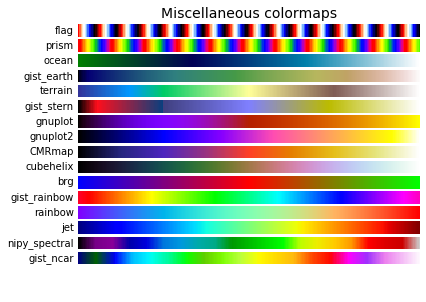

In [10]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

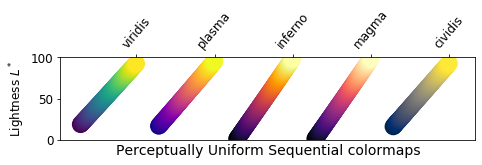

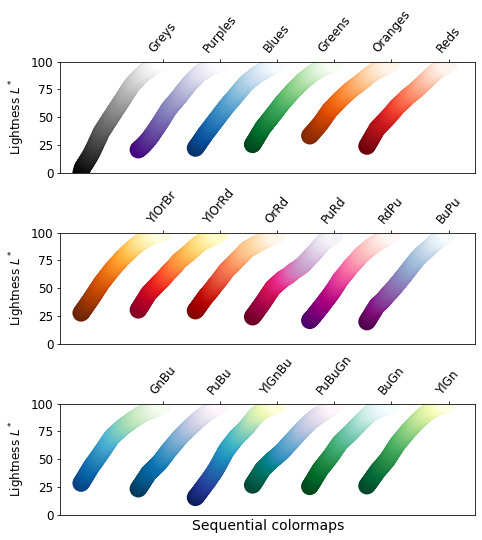

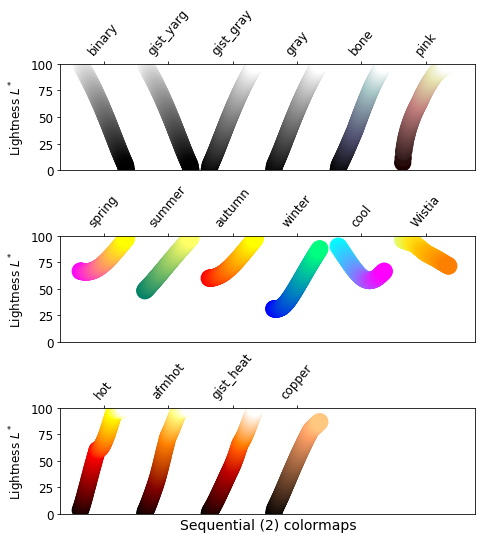

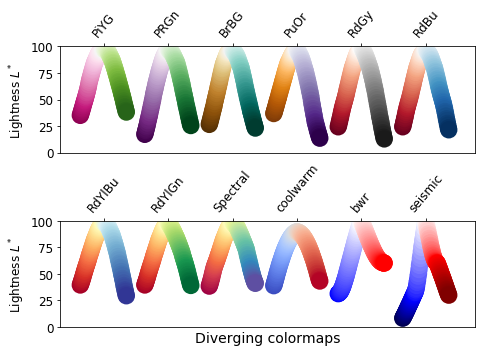

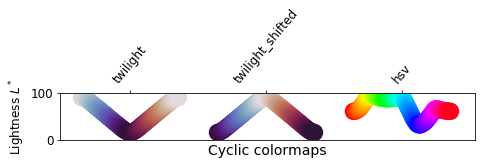

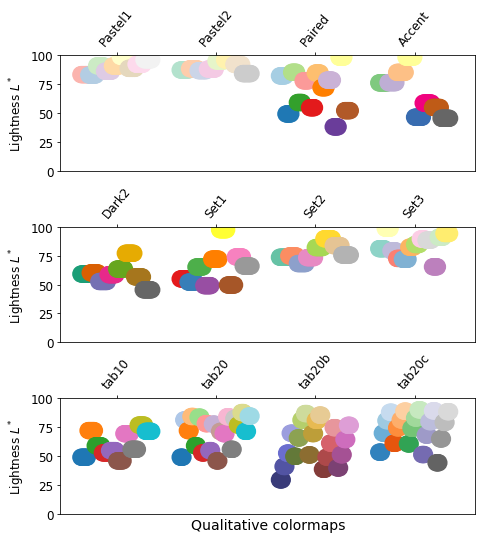

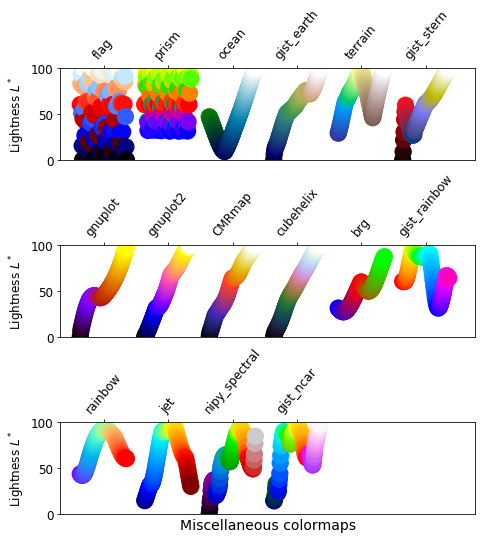

In [11]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axes = plt.subplots(nrows=nsubplots, squeeze=False,
                             figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axes.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # http://stackoverflow.com/questions/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axes[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

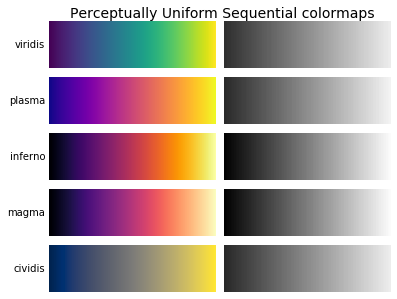

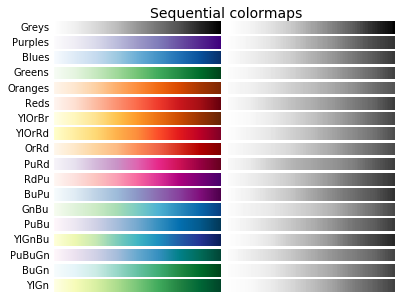

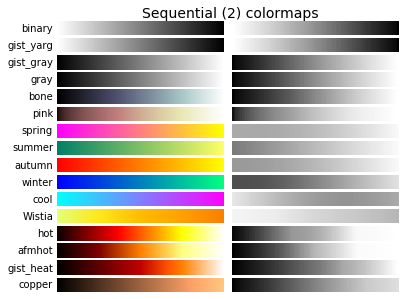

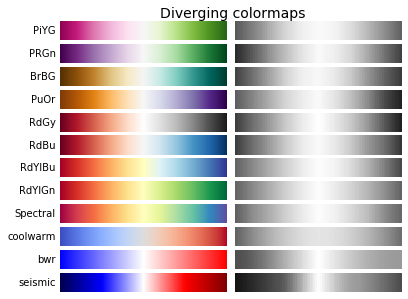

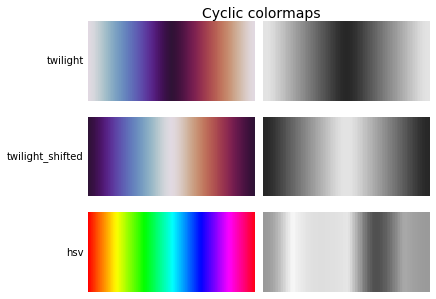

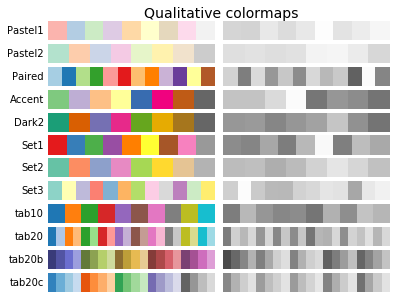

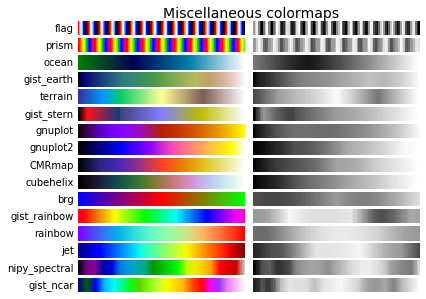

In [12]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axes, cmap_list):

        # Get RGB values for colormap.
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)

## Mandelbrot Set Method 2

In [ ]:
#animating visual
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [ ]:
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,